In [1]:
# taxa de retorno de um portfólio
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']

mydata = pd.DataFrame()

mydata = yf.download(tickers, start='1995-1-1')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [3]:
print(mydata)

Ticker              F          GE        MSFT          PG
Date                                                     
1995-01-03   3.618233   20.263540    2.319452    7.484915
1995-01-04   3.715586   20.263540    2.336313    7.424916
1995-01-05   3.683135   20.313200    2.297777    7.319917
1995-01-06   3.683135   20.213877    2.336313    7.334920
1995-01-09   3.748036   20.015200    2.321862    7.304914
...               ...         ...         ...         ...
2024-08-09  10.100000  167.130005  405.289490  170.539993
2024-08-12   9.860000  166.869995  406.078064  166.809998
2024-08-13  10.140000  167.960007  413.265137  167.289993
2024-08-14  10.180000  167.949997  416.109985  168.800003
2024-08-15  10.460000  169.940002  421.029999  167.919998

[7457 rows x 4 columns]


In [5]:
# normalização dos dados para 100
# pt/pt0 * 100
mydata.iloc[0]

Ticker
F        3.618233
GE      20.263540
MSFT     2.319452
PG       7.484915
Name: 1995-01-03 00:00:00, dtype: float64

<Axes: xlabel='Date'>

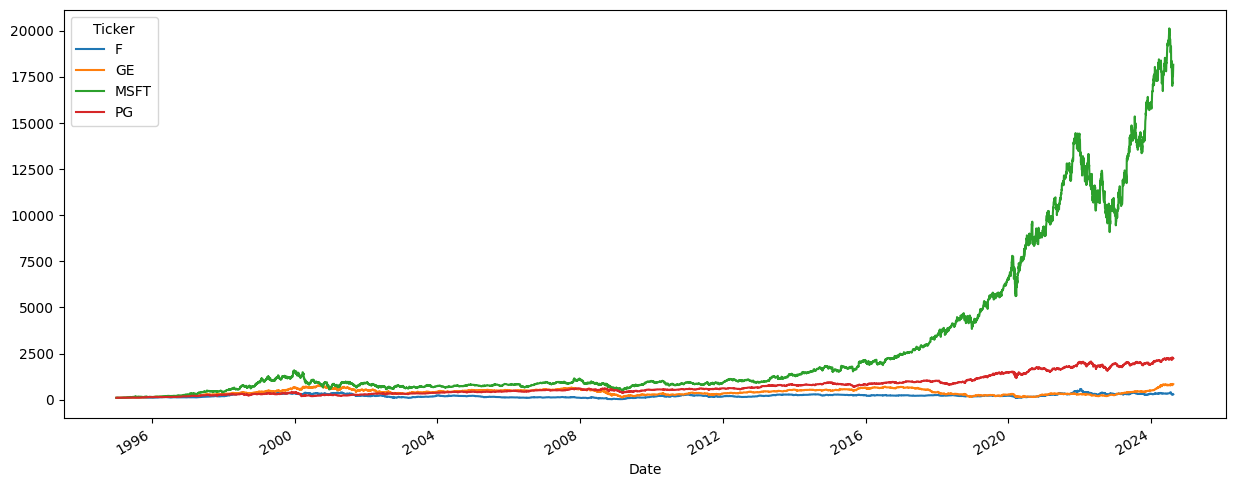

In [6]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))

Calculating the Return of a Portfolio

In [8]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

Ticker,F,GE,MSFT,PG
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.026906,0.000000,0.007269,-0.008016
1995-01-05,-0.008734,0.002451,-0.016494,-0.014141
1995-01-06,0.000000,-0.004890,0.016771,0.002050
1995-01-09,0.017621,-0.009829,-0.006186,-0.004091


In [9]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [10]:
np.dot(returns, weights)

array([        nan,  0.0065399 , -0.00922976, ...,  0.0138765 ,
        0.00494883,  0.01149105])

In [11]:
annual_returns = returns.mean() * 250
annual_returns

Ticker
F       0.116138
GE      0.122091
MSFT    0.222603
PG      0.128561
dtype: float64

In [13]:
np.dot(annual_returns, weights)

np.float64(0.14734827846940324)

In [18]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print(pfolio_1)

14.7 %


In [19]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [20]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 3) * 100) + ' %'

In [21]:
print(pfolio_2)

13.5 %
